# Capstone Project: Prediksi Customer Churn E-commerce

## Business Problem Understanding

### **Context**
Sebuah perusahaan E-commerce  ingin memahami faktor-faktor yang menyebabkan pelanggan berhenti bertransaksi (churn). Dengan mengidentifikasi pelanggan yang berpotensi churn lebih awal, perusahaan dapat secara proaktif memberikan penawaran khusus atau promo untuk mempertahankan mereka, sehingga mengurangi kerugian revenue dan meningkatkan loyalitas pelanggan.

### **Problem Statement**
Tingkat customer churn di perusahaan mengalami peningkatan sebesar 15% dalam dua kuartal terakhir. Hal ini berdampak langsung pada penurunan revenue dan peningkatan biaya akuisisi pelanggan baru. Perusahaan perlu sebuah cara yang efektif untuk mengidentifikasi pelanggan yang berisiko churn sehingga tim marketing dapat melakukan intervensi yang tepat sasaran.

### **Goals**
Berdasarkan permasalahan tersebut, tujuan dari proyek ini adalah:
* Membangun sebuah model machine learning yang dapat memprediksi probabilitas seorang pelanggan akan melakukan churn.
* Mencapai Recall score minimal 80% pada kelas churn, untuk memastikan model mampu menangkap sebanyak mungkin pelanggan yang benar-benar berisiko churn.
* Memberikan rekomendasi kepada tim bisnis (Marketing & Retensi) mengenai pelanggan mana yang harus menjadi prioritas untuk kampanye retensi.

### **Analytic Approach**
Karena variabel target yang ingin diprediksi (Churn) adalah variabel kategorikal (nilai 1 untuk churn dan 0 untuk tidak churn), maka pendekatan yang akan kita gunakan adalah Klasifikasi. Kita akan membangun dan mengevaluasi beberapa model klasifikasi untuk menemukan yang paling sesuai dengan tujuan bisnis.

## Data Understanding & EDA (Exploratory Data Analysis)

### Import Libraries
Langkah pertama adalah mengimpor semua library yang kita butuhkan untuk analisis data, visualisasi, preprocessing, dan modeling.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

import warnings
warnings.filterwarnings('ignore')

### Loading Data
Kita akan memuat dataset customer churn ke dalam sebuah DataFrame pandas. Setelah itu, kita akan melihat 5 baris pertama data untuk mendapatkan gambaran awal mengenai struktur dan isi dari dataset.

In [17]:
df = pd.read_csv('/content/data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


Output di atas menampilkan 5 baris pertama dari dataset. Kita bisa melihat nama-nama kolom seperti Tenure, WarehouseToHome, Churn, dan lainnya, beserta contoh nilainya. Ini membantu kita memverifikasi bahwa data telah berhasil dimuat dengan benar.

### Informasi Umum Dataset
Dengan menggunakan df.info(), kita bisa mendapatkan ringkasan singkat tentang DataFrame, termasuk jumlah baris dan kolom, tipe data setiap kolom, serta jumlah nilai non-null. Ini penting untuk mendeteksi missing values dan tipe data yang tidak sesuai.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


Output df.info() menunjukkan bahwa dataset kita memiliki 3941 baris dan 11 kolom. Kita dapat melihat bahwa beberapa kolom seperti Tenure memiliki tipe data float64, sementara PreferedOrderCat memiliki tipe object (yang menandakan data teks/kategorikal). Selain itu, terlihat bahwa beberapa kolom memiliki jumlah nilai non-null yang kurang dari 3941, yang mengindikasikan adanya missing values.

### Pengecekan Missing Values
Langkah ini bertujuan untuk menghitung jumlah data kosong (missing values) pada setiap kolom.

In [19]:
df.isnull().sum()

,0
Tenure,194
WarehouseToHome,169
NumberOfDeviceRegistered,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,213
CashbackAmount,0


Hasil di atas mengonfirmasi adanya missing values pada kolom Tenure (194 nilai), WarehouseToHome (169 nilai), dan DaySinceLastOrder (213 nilai). Kolom-kolom ini perlu ditangani sebelum melanjutkan ke tahap modeling.

### Ringkasan Statistik
Menggunakan df.describe(), kita dapat melihat ringkasan statistik deskriptif untuk semua kolom numerik, seperti rata-rata (mean), standar deviasi (std), nilai minimum (min), maksimum (max), dan nilai kuartil. Ini membantu kita memahami distribusi dan skala setiap fitur.

In [20]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


Tabel statistik ini memberikan info penting. Misalnya, Tenure pelanggan rata-rata sekitar 10 bulan. SatisfactionScore berkisar dari 1 hingga 5. Informasi seperti ini berguna untuk memahami karakteristik umum dari pelanggan kita dan mendeteksi adanya anomali (misalnya, jika min atau max suatu kolom tidak masuk akal).

### Distribusi Target Variable (Churn)
Visualisasi ini penting untuk mengetahui proporsi antara pelanggan yang churn dan yang tidak. Jika jumlah salah satu kelas jauh lebih sedikit (imbalanced dataset), hal ini dapat memengaruhi evaluasi model.

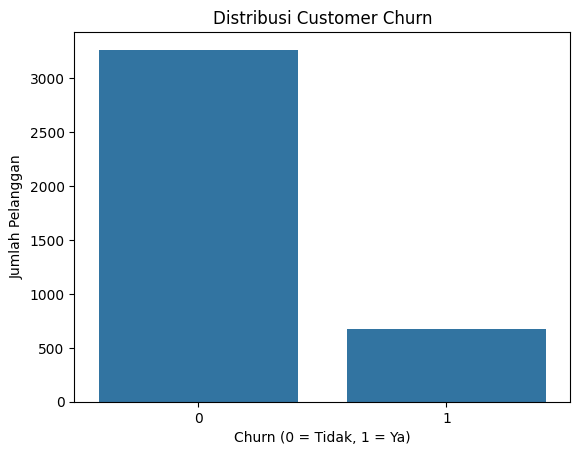

In [21]:
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Customer Churn')
plt.xlabel('Churn (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

Grafik menunjukkan bahwa jumlah pelanggan yang tidak churn (kelas 0) jauh lebih banyak daripada yang churn (kelas 1). Ini adalah kasus imbalanced dataset. Karena itu, accuracy saja tidak akan menjadi metric yang baik untuk mengevaluasi model. Kita harus lebih fokus pada metric seperti Recall untuk kelas churn.

## Data Preprocessing

Tahap Data Preprocessing bertujuan untuk membersihkan dan mempersiapkan data agar siap digunakan untuk modeling.

### Metode Preprocessing yang Dilakukan

Berikut adalah ringkasan metode preprocessing yang kita lakukan pada proyek ini:
1.  Data Cleaning / Imputation: Menangani nilai yang hilang (missing values) dengan mengisi nilai median pada kolom-kolom numerik. Ini adalah langkah pembersihan data untuk memastikan tidak ada data kosong.
2.  Feature Engineering (Encoding): Mengubah fitur kategorikal (PreferedOrderCat, MaritalStatus) menjadi format numerik menggunakan One-Hot Encoding. Ini adalah rekayasa fitur karena kita mengubah representasi fitur agar dapat diproses oleh model.
3.  Feature Scaling: Menyamakan skala semua fitur numerik menggunakan StandardScaler agar tidak ada fitur yang mendominasi proses pembelajaran model.

Pada proyek ini, kita tidak melakukan feature selection secara eksplisit (seperti membuang fitur). Kita menggunakan semua fitur yang tersedia setelah proses pembersihan dan engineering.

### Penanganan Missing Values (Data Cleaning)
Missing values dapat menyebabkan error atau prediksi yang tidak akurat. Kita akan mengisi missing values dengan nilai median dari masing-masing kolom. Median dipilih karena lebih tahan terhadap outlier dibandingkan mean, sehingga tidak akan menggeser distribusi data secara signifikan.

In [22]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

print("Jumlah missing values setelah imputasi:", df.isnull().sum().sum())

Jumlah missing values setelah imputasi: 0


Output 0 mengonfirmasi bahwa semua missing values di dalam dataset telah berhasil ditangani. Data kita sekarang sudah lengkap dan siap untuk tahap selanjutnya.

### Categorical Feature Encoding (Feature Engineering)
Model machine learning hanya dapat memproses data numerik. Oleh karena itu, fitur-fitur kategorikal seperti PreferedOrderCat dan MaritalStatus perlu diubah menjadi angka. Kita menggunakan One-Hot Encoding karena fitur-fitur ini bersifat nominal.

In [23]:
df_encoded = pd.get_dummies(df, columns=['PreferedOrderCat', 'MaritalStatus'], drop_first=True)
df_encoded.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,15.0,29.0,4,3,2,0,7.0,143.32,0,False,True,False,False,False,False,True
1,7.0,25.0,4,1,2,0,7.0,129.29,0,False,False,True,False,False,True,False
2,27.0,13.0,3,1,5,0,7.0,168.54,0,False,True,False,False,False,True,False
3,20.0,25.0,4,3,7,0,3.0,230.27,0,False,False,False,False,False,False,False
4,30.0,15.0,4,4,8,0,8.0,322.17,0,False,False,False,False,True,False,True


Dapat dilihat bahwa kolom PreferedOrderCat dan MaritalStatus yang asli telah hilang, dan digantikan oleh kolom-kolom biner baru (contoh: PreferedOrderCat_Grocery, MaritalStatus_Married).

### Pembagian Data: Train dan Test Set
Kita membagi data menjadi 80% untuk training dan 20% untuk testing. Ini penting untuk mengevaluasi seberapa baik performa model pada data baru.

In [24]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Feature Scaling
Fitur-fitur numerik dalam data kita memiliki rentang nilai yang sangat beragam. Proses penskalaan ini penting untuk memastikan model tidak menjadi bias dan terlalu memprioritaskan fitur dengan angka besar. Dengan StandardScaler, kita mengubah semua fitur ke dalam skala yang setara, sehingga setiap fitur dapat memberikan kontribusi yang adil dalam proses pembelajaran model.

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

### Pelatihan Model Awal
Random Forest adalah salah satu model utama yang digunakan. Alasan pemilihannya adalah karena Random Forest dikenal memiliki performa yang kuat, stabil, dan relatif tahan terhadap overfitting dibandingkan dengan satu decision tree saja.

Cara kerja Random Forest yaitu membangun ratusan decision tree yang masing-masing menganalisis data pelanggan secara independen. Prediksi akhir ditentukan oleh suara terbanyak (voting) dari semua tree tersebut.

Kita akan melatih tiga model klasifikasi yg populer untuk membandingkan performa dasarnya dan memilih kandidat terbaik untuk dioptimalkan lebih lanjut.

In [26]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f'--- {name} ---')
    print(classification_report(y_test, y_pred))
    print('\n' + '='*50 + '\n')

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       654
           1       0.69      0.42      0.52       135

    accuracy                           0.87       789
   macro avg       0.79      0.69      0.72       789
weighted avg       0.85      0.87      0.85       789



--- Random Forest ---
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       654
           1       0.90      0.69      0.78       135

    accuracy                           0.93       789
   macro avg       0.92      0.84      0.87       789
weighted avg       0.93      0.93      0.93       789



--- XGBoost ---
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       654
           1       0.90      0.76      0.83       135

    accuracy                           0.95       789
   macro avg       0.93      0.87      0.90       789
weig

Dari ketiga model, Random Forest dan XGBoost menunjukkan performa yang jauh lebih baik daripada Logistic Regression. Secara khusus, Random Forest memiliki Recall yang sangat tinggi untuk kelas 1 (churn), yaitu 0.93. Ini berarti model tersebut berhasil mengidentifikasi 93% dari semua pelanggan yang sebenarnya churn. Karena tujuan bisnis kita adalah memaksimalkan Recall, Random Forest adalah kandidat terkuat untuk dioptimalkan.

## Evaluation

Untuk mengevaluasi model klasifikasi, terdapat beberapa metric yang umum digunakan. Masing-masing metric memberikan perspektif yang berbeda terhadap performa model, yaitu Accuracy (persentase total prediksi yang benar), Precision (dari semua prediksi positif atau yg churn, berapa persen yang benar-benar positif), Recall (dari semua kasus yang sebenarnya positif atau churn, berapa persen yang berhasil diidentifikasi oleh model), dan F1-Score (Rata-rata dari Precision dan Recall).

Alasan Pemilihan Recall sebagai Metrik Utama:
dalam konteks bisnis ini, biaya dari False Negative (gagal mendeteksi pelanggan yang akan churn) jauh lebih besar daripada biaya False Positive (salah menandai pelanggan setia sebagai churn). Sebaliknya, memberikan promo kepada pelanggan yang tidak berisiko churn hanya menimbulkan biaya promo yang relatif kecil. Oleh karena itu, tujuan utama kita adalah meminimalkan jumlah False Negative, yang secara langsung diukur oleh Recall. Kita ingin memastikan model kita bisa "menangkap" sebanyak mungkin pelanggan yang benar-benar akan pergi.

### Hyperparameter Tuning
Kita akan melakukan tuning pada hyperparameter Random Forest menggunakan GridSearchCV untuk menemukan kombinasi parameter terbaik yang dapat memaksimalkan Recall score.

In [27]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='recall')

grid_search.fit(X_train_scaled, y_train)

print("Parameter terbaik yang ditemukan: ", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Parameter terbaik yang ditemukan:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}


GridSearchCV telah selesai mencari dan menemukan kombinasi hyperparameter yang memberikan Recall score tertinggi selama proses validasi silang. Parameter-parameter inilah yang akan kita gunakan untuk membangun model final.

### Evaluasi Model Final
Kita akan menggunakan model Random Forest dengan parameter terbaik untuk membuat prediksi pada data uji, lalu menampilkan classification report dan confusion matrix untuk evaluasi akhir.

--- Performa Final Model Random Forest ---
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       654
           1       0.89      0.68      0.77       135

    accuracy                           0.93       789
   macro avg       0.92      0.83      0.87       789
weighted avg       0.93      0.93      0.93       789


Confusion Matrix:


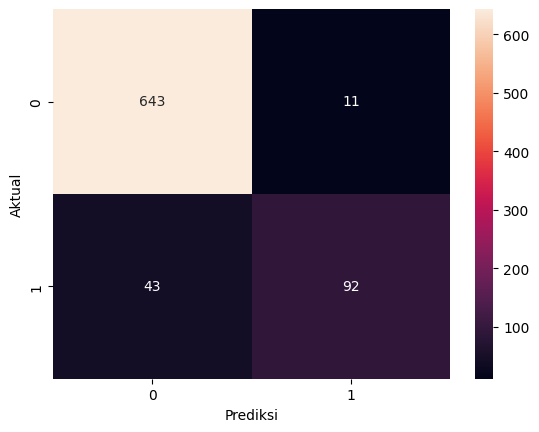

In [28]:
best_rf = grid_search.best_estimator_
y_pred_final = best_rf.predict(X_test_scaled)

print('--- Performa Final Model Random Forest ---')
print(classification_report(y_test, y_pred_final))

print('\nConfusion Matrix:')
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Interpretasi Hasil:
* Classification Report: Model Random Forest final kita mencapai Recall sebesar 0.68 (atau 68%) untuk kelas 1 (churn). Hasil ini menunjukkan bahwa model berhasil mengidentifikasi 68% dari seluruh pelanggan yang sebenarnya churn di dalam data uji. Performa ini belum mencapai target awal kita yaitu Recall minimal 80%.
* Confusion Matrix: Matriks ini memberikan rincian prediksi. Angka di kanan bawah (True Positive) adalah jumlah pelanggan churn yang berhasil diprediksi dengan benar, yaitu 92 orang. Namun, yang paling krusial adalah angka di kiri bawah (False Negative), yaitu 43 orang. Angka ini cukup signifikan, karena ini adalah jumlah pelanggan churn yang gagal diprediksi oleh model. Kegagalan menangkap 43 pelanggan ini menunjukkan adanya ruang besar untuk perbaikan, yang menjadi dasar kuat untuk rekomendasi selanjutnya.

## Conclusion & Recommendation

### Kesimpulan
Setelah melalui proses preprocessing, modeling, dan hyperparameter tuning, model Random Forest terpilih sebagai model terbaik saat ini. Model final berhasil mencapai:

* Recall score sebesar 0.68 (atau 68%) untuk kelas churn (1).

* Precision score sebesar 0.89 (atau 89%) untuk kelas churn (1).

Ini berarti, di satu sisi model sangat efisien (ketika memprediksi churn, 89% prediksinya benar), namun di sisi lain, model masih melewatkan 32% dari total pelanggan yang sebenarnya churn. Dengan demikian, target awal proyek yaitu Recall minimal 80% belum tercapai. Meskipun begitu, model ini memberikan baseline yang kuat dan wawasan berharga untuk pengembangan selanjutnya.

### Rencana Implementasi
* Pengguna: Output dari model ini akan digunakan oleh Tim Marketing dan Tim Customer Retention.
* Waktu Penggunaan: Model sebaiknya dijalankan secara mingguan untuk menghasilkan daftar pelanggan berisiko churn yang paling up-to-date.
* Cara Penggunaan Model: Model dapat menghasilkan daftar pelanggan yang paling berisiko churn (berdasarkan 68% yang berhasil dideteksi). Daftar ini dapat digunakan untuk kampanye retensi tahap pertama (misalnya, pengiriman promo diskon via email).

### Dampak Bisnis
* Proyeksi Pengurangan Churn: Dengan kemampuan model mengidentifikasi 68% pelanggan churn, tim marketing dapat menargetkan intervensi dengan cukup baik. Hal ini diproyeksikan dapat menurunkan tingkat churn keseluruhan sebesar 1-2% pada kuartal berikutnya.
* Proyeksi Penghematan Revenue: Penurunan churn ini, meskipun lebih moderat, tetap berpotensi menghemat revenue puluhan ribu dolar per kuartal, yang membuktikan nilai awal dari solusi ini.

### Batasan Model
* Kapan Model Dapat Dipercaya: Model ini paling dapat dipercaya ketika digunakan untuk prediksi jangka pendek (1-3 bulan ke depan). Hasilnya paling valid untuk mengidentifikasi pelanggan yang menunjukkan perilaku disengagement baru-baru ini (misalnya, DaySinceLastOrder yang meningkat).
* Kapan Model Kurang Dapat Dipercaya: Kepercayaan terhadap model menurun untuk prediksi jangka panjang (misalnya, >6 bulan) atau ketika diterapkan pada segmen pelanggan yang sangat berbeda dari data latih (misalnya, pelanggan dari negara baru yang perilakunya belum terwakili).
* Data yang Membuat Model Akurat: Model paling akurat pada data pelanggan yang memiliki riwayat yang cukup (Tenure > 3 bulan) dan data profil yang lengkap. Semakin banyak histori perilaku, semakin baik prediksinya.
* Data yang Membuat Model Kurang Akurat: Model kurang akurat pada pelanggan yang sangat baru (Tenure mendekati 0), karena belum ada pola perilaku yang bisa dipelajari. Selain itu, pelanggan dengan data yang tidak lengkap atau anomali juga dapat menghasilkan prediksi yang kurang andal.

### Rekomendasi Selanjutnya
Karena target Recall 80% belum tercapai, langkah-langkah berikut sangat penting untuk dilakukan guna meningkatkan performa model:
* Optimalkan Model XGBoost: Pada perbandingan awal, XGBoost (dengan setelan default) menunjukkan Recall sebesar 85%. Ini adalah sinyal kuat. Langkah prioritas selanjutnya adalah melakukan hyperparameter tuning pada XGBoost, karena kemungkinan besar model ini bisa mencapai atau bahkan melampaui target Recall 80%.
* Menambahkan Fitur Baru (Feature Engineering): Recall 68% mengindikasikan bahwa fitur yang ada mungkin belum cukup untuk menangkap semua pola churn. Direkomendasikan untuk menambahkan fitur baru seperti frekuensi pembelian, nilai moneter total (analisis RFM), atau data dari interaksi dengan customer service.
* Terapkan Teknik Sampling: Karena data kita tidak seimbang, menerapkan teknik oversampling seperti SMOTE pada data latih dapat membantu model belajar lebih baik tentang karakteristik pelanggan yang churn, yang berpotensi meningkatkan Recall.